# import

import library

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/salary_data.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


# Exploratory data analysis

1. Data description

In [4]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       100 non-null    object 
 1   experience_years  100 non-null    float64
 2   salary            100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


,experience_years,salary
count,100.000000,100.000000
mean,10.032000,2663.418000
std,5.804733,664.867378
min,0.000000,1046.400000
25%,5.025000,2192.750000
50%,10.000000,2984.150000
75%,14.975000,3174.500000
max,20.000000,3405.800000


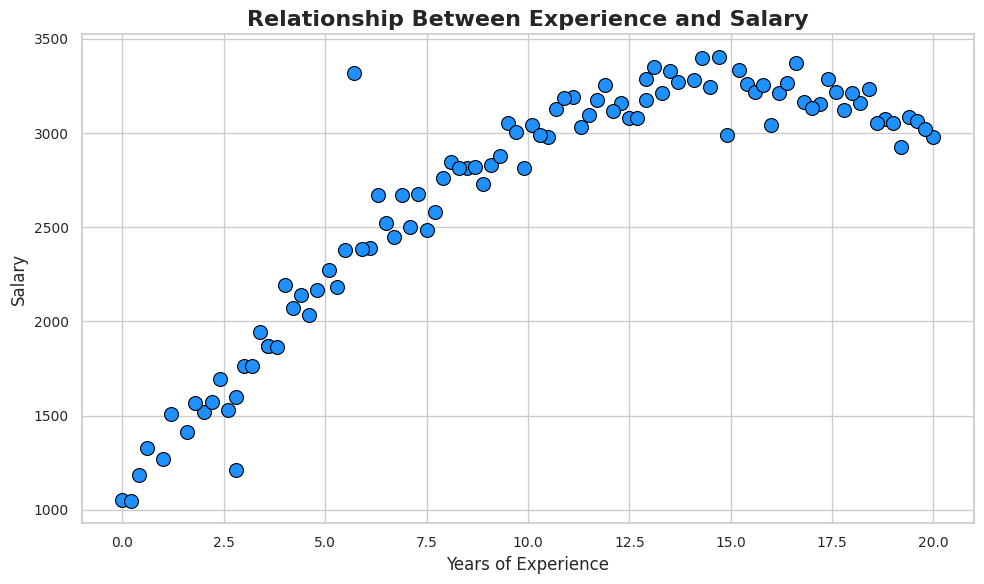

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['experience_years'], y=data['salary'],
                color="dodgerblue", s=100, edgecolor="black")

plt.title('Relationship Between Experience and Salary', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

2. Data cleaning

In [4]:
df = data.copy()
print("Data sebelum pemerikasaan duplikasi :")
print(df.shape)

Data sebelum pemerikasaan duplikasi :
(100, 3)


In [5]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,employee_id,experience_years,salary
10,EM_111,3.6,1867.9
42,EM_111,3.6,1867.9


In [11]:
print("\nData setelah pemerikasaan duplikasi :")
print(df.shape)


Data setelah pemerikasaan duplikasi :
(99, 3)


In [6]:
df.isna().sum()

,0
employee_id,0
experience_years,0
salary,0


3. Data splitting

splitting experience data (x) and salary (y)

In [72]:
X = df['experience_years']
X.head()

,experience_years
0,16.8
1,10.7
2,14.1
3,9.1
4,8.9


In [67]:
y = df['salary']
y.head()

,salary
0,3166.9
1,3126.9
2,3278.8
3,2828.8
4,2728.7


spliting the data to training and testing

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=42)

In [95]:
X_train.shape

(75,)

In [96]:
X_test.shape

(25,)

In [76]:
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

# Machine learning models

1. Linear regresssion model

In [91]:
linear_model = LinearRegression()
linear_model.fit(X_train_reshape, y_train)
linear_pred = linear_model.predict(X_test_reshape)
linear_pred

array([2228.01695619, 2410.58746294, 3252.44035519, 2015.01803165,
       2187.44573247, 1954.16119606, 2167.16012061, 2917.72775948,
       1994.73241979, 3333.58280264, 1873.01874862, 1852.73313676,
       2613.44358156, 2207.73134433, 3495.86769753, 2532.30113411,
       3171.29790775, 2288.87379178, 3120.58387809, 2593.1579697 ,
       3232.15474333, 2096.16047909, 2451.15868667, 1994.73241979,
       3617.5813687 ])

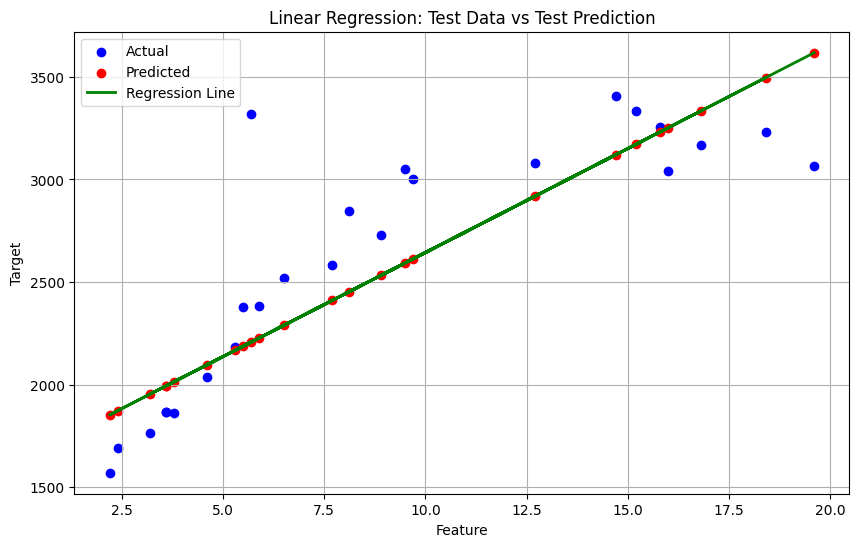

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, linear_pred, color='red', label='Predicted')
plt.plot(X_test, linear_pred, color='green', label='Regression Line', linewidth=2)  # Line for predicted values
plt.title('Linear Regression: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
y_test_pred = linear_model.predict(X_test_reshape)
y_train_pred = linear_model.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 112597.74
  Test : 108716.22
  Gap  : 3881.51
R^2 Score:
  Train: 0.76
  Test : 0.69
      


In [100]:
print('Intercept of the Linear Regression model:',linear_model.intercept_)
print('Coefficient of the line Linear Regression:',linear_model.coef_)

Intercept of the Linear Regression model: 1629.5914062822706
Coefficient of the line Linear Regression: [101.42805931]


**linear regression model**

y =  1629.591 + 101.428

2. Decision tree model



In [104]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_reshape, y_train)
tree_pred = tree_model.predict(X_test_reshape)
tree_pred

array([2390.7, 2487.7, 3214.5, 2195.4, 2271.2, 1761. , 2271.2, 3078.1,
       1943.8, 3373.3, 1527.6, 1518.9, 2813.5, 2390.7, 3158.5, 2821.3,
       3257.5, 2671.8, 3244.4, 2878.2, 3217. , 2142.6, 2815.9, 1943.8,
       3020.3])

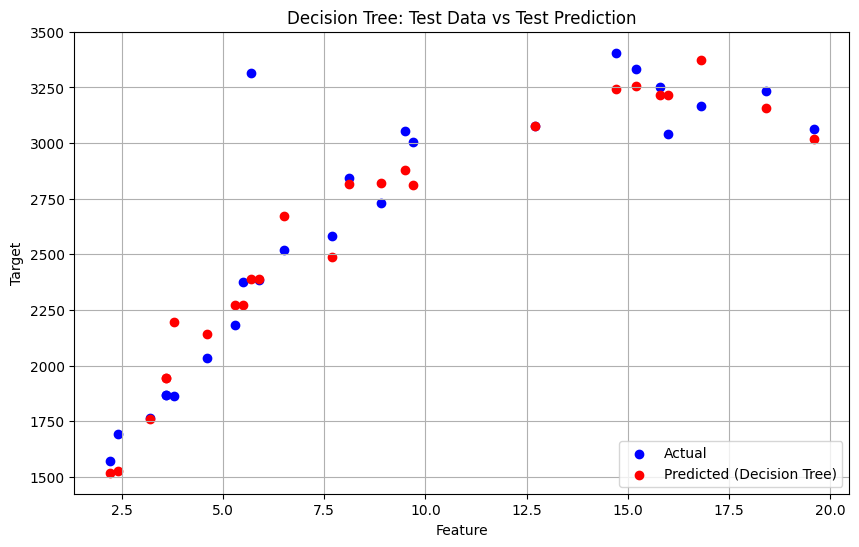

In [105]:
y_pred_dt = tree_model.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_dt, color='red', label='Predicted (Decision Tree)')
plt.title('Decision Tree: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
y_test_pred = tree_model.predict(X_test_reshape)
y_train_pred = tree_model.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 1067.43
  Test : 50403.07
  Gap  : 49335.65
R^2 Score:
  Train: 1.00
  Test : 0.86
      


3. random forest regression model

In [111]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_reshape, y_train)
forest_pred = forest_model.predict(X_test_reshape)
forest_pred

array([2461.156     , 2578.662     , 3224.632     , 2101.84      ,
       2299.104     , 1742.36583333, 2238.806     , 3134.53106667,
       1936.74133333, 3308.094     , 1495.38755952, 1522.79466667,
       2849.448     , 2371.049     , 3125.102     , 2824.386     ,
       3185.887     , 2570.806     , 3213.978     , 2863.179     ,
       3228.888     , 2150.538     , 2801.578     , 1936.74133333,
       3028.502     ])

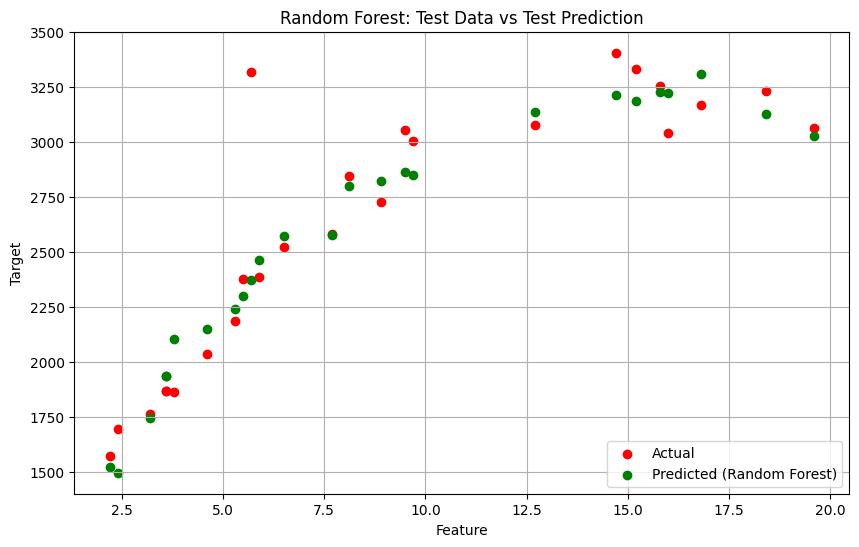

In [113]:
y_pred_rf = forest_model.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_rf, color='green', label='Predicted (Random Forest)')
plt.title('Random Forest: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
y_test_pred = forest_model.predict(X_test_reshape)
y_train_pred = forest_model.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 2908.97
  Test : 49274.51
  Gap  : 46365.54
R^2 Score:
  Train: 0.99
  Test : 0.86
      
